In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [12]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [15]:
# 子类
# Model类:https://tensorflow.google.cn/api_docs/python/tf/keras/Model
# 面向过程-->面向对象

In [16]:
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super().__init__()
        """定义模型的层次"""
        self.hidden1_layer=keras.layers.Dense(30,activation='relu')
        self.hidden2_layer=keras.layers.Dense(30,activation='relu')
        self.output_layer=keras.layers.Dense(1)
    def call(self,input):
        """完成模型的正向计算(搭建)，build方法检查之后调用call方法"""
        # input是输入的特征形状
        hidden1=self.hidden1_layer(input)
        hidden2=self.hidden2_layer(hidden1)
        concat=keras.layers.concatenate([input,hidden2])
        output=self.output_layer(concat)
        return output

model=WideDeepModel() # model=keras.models.Sequential([WideDeepModel(),])
model.build(input_shape=(None,8)) # model(input_shape=(None,8))

In [17]:
print(model.summary())

Model: "wide_deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  270       
                                                                 
 dense_4 (Dense)             multiple                  930       
                                                                 
 dense_5 (Dense)             multiple                  39        
                                                                 
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(0.001))

callbacks=[keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
history=model.fit(x_train_scaled,y_train,
                  validation_data=(x_valid_scaled,y_valid),
                  epochs=100,
                  callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.9326 - val_loss: 0.8010
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6794 - val_loss: 0.6744
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6098 - val_loss: 0.6301
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5736 - val_loss: 0.5969
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5458 - val_loss: 0.5740
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5249 - val_loss: 0.5511
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.5328
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4960 - val_loss: 0.5218
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4853 - val_loss: 0.5099
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4770 - val_lo

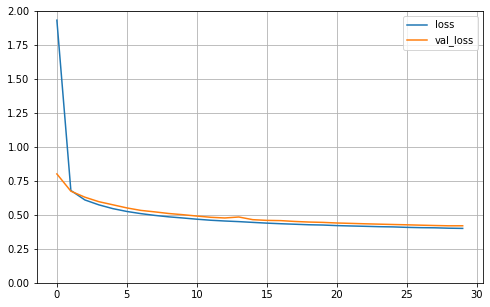

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

In [20]:
print(model.evaluate(x_test_scaled, y_test, verbose=0))

0.4197792112827301
